# SVM

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Usamos funciones para crear puntos con diferentes formas

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [3]:
color = np.array(["r", "b"])

# Linealmente separables

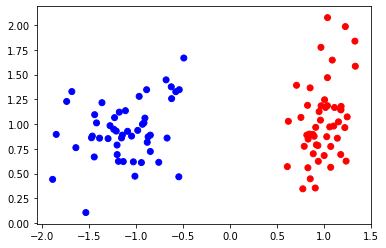

In [4]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.show()

# Separamos los datos

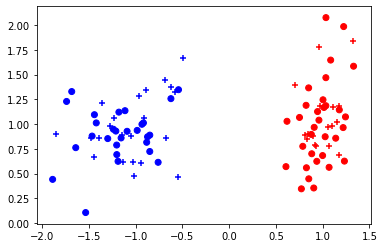

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=color[y_train])
plt.scatter(X_test[:, 0], X_test[:, 1], c=color[y_test], marker="+")
plt.show()

# Entrenamos el clasificador

In [5]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Veamos cómo se separaron los puntos. Todos quedaron bien clasificados.

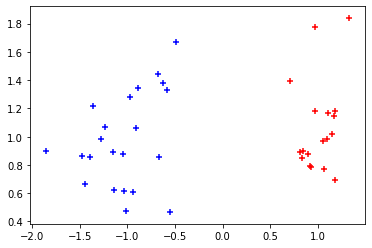

In [9]:
pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=color[pred], marker="+")
plt.show()

# Media luna

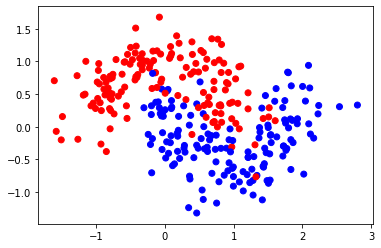

In [10]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Así debería quedar:


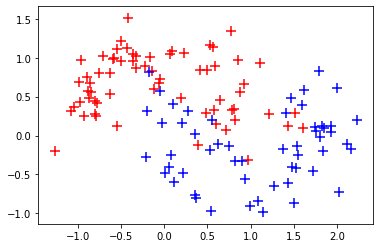

In [12]:
pred = clf.predict(X_test)
mkr = np.array(["r", "g", "b"])
diff = np.where(pred != y_test)
print("Así debería quedar:")
plt.scatter(X_test[:, 0], X_test[:, 1], s=100, c=color[y_test], marker="+")
plt.show()

Los "+" son las predicciones.

Las estrellas es donde el clasificador se equivocó.

Así queda:


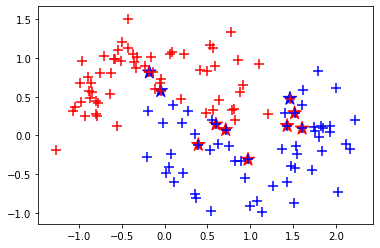

In [13]:
print("Así queda:")
plt.scatter(X_test[diff][:, 0], X_test[diff][:, 1], c=color[y_test[diff]], s=200, marker="*")
plt.scatter(X_test[:, 0], X_test[:, 1], c=color[pred], s=100, marker="+")
plt.show()

# Circulos

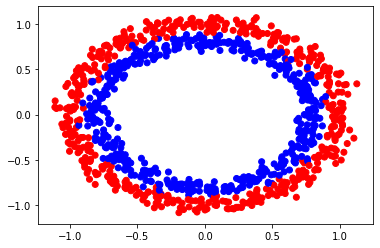

In [15]:
X, y = make_circles(n_samples=1000, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Así debería quedar:


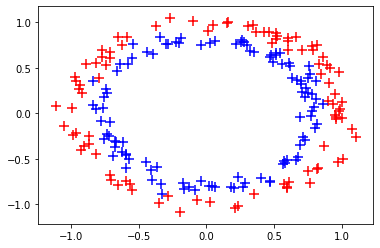

In [20]:
pred = clf.predict(X_test)
mkr = np.array(["r", "g", "b"])
diff = np.where(pred != y_test)
print("Así debería quedar:")
plt.scatter(X_test[:, 0], X_test[:, 1], s=100, c=color[y_test], marker="+")
plt.show()

Así queda:


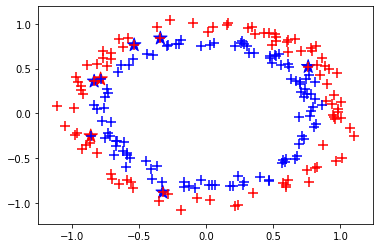

In [21]:
print("Así queda:")
plt.scatter(X_test[diff][:, 0], X_test[diff][:, 1], c=color[y_test[diff]], s=200, marker="*")
plt.scatter(X_test[:, 0], X_test[:, 1], c=color[pred], s=100, marker="+")
plt.show()

# Kernel lineal

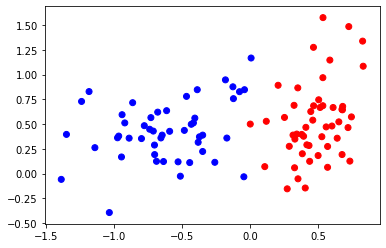

In [23]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.5)
X[0] = [0, .5]
y[0] = 0
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.show()

## C=1

Para obtener la recta de división se usa el vector de pesos w y el bias b.

In [24]:
clf = SVC(C=1, kernel="linear")
clf.fit(X, y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.1,.2)
yy = a * xx - clf.intercept_[0] / w[1]

Así queda:


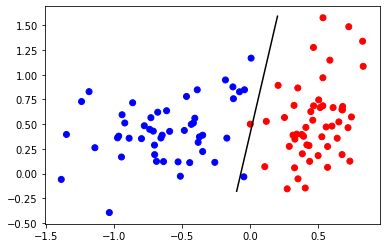

In [25]:
print("Así queda:")
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.plot(xx, yy, 'k-')
plt.show()

## C=100

Así queda:


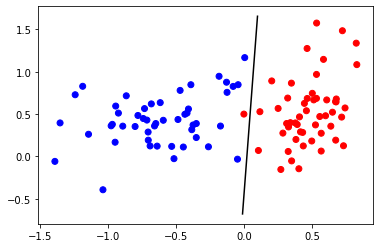

In [90]:
clf = SVC(C=100, kernel="linear")
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.01,.1)
yy = a * xx - clf.intercept_[0] / w[1]
print("Así queda:")
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.plot(xx, yy, 'k-')
plt.show()

## C=10000

Así queda:


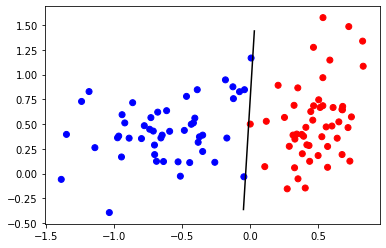

In [95]:
clf = SVC(C=10000, kernel="linear")
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.05,.03)
yy = a * xx - clf.intercept_[0] / w[1]
print("Así queda:")
plt.scatter(X[:, 0], X[:, 1], c=color[y])
plt.plot(xx, yy, 'k-')
plt.show()

Los tipos de kernel pueden ser linear, poly, rbf.